In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as py

In [2]:
dummy_df = pd.read_excel('ENB2012_data.xlsx')

In [3]:
df = pd.read_csv('energydata_complete.csv')

In [4]:
dummy_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [5]:
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [6]:
#rename   columns  
column_names   =   { 'X1':'Relative_Compactness' ,'X2':'Surface_Area',
                    'X3' :'Wall_Area' ,'X4' : 'Roof_Area','X5' :'Overall_Height', 
                    'X6' :'Orientation' ,'X7' : 'Glazing_Area',
                    'X8' :'Glazing_Area_Distribution',
                    'Y1' :'Heating_Load' ,'Y2' :'Cooling_Load'}
dummy_df = dummy_df.rename(columns=column_names)

In [7]:
dummy_df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [8]:
#Select a sample of the dataset
simple_linear_reg_df = dummy_df[['Relative_Compactness','Cooling_Load']].sample(15,random_state=2)  

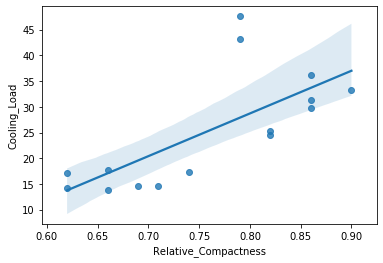

In [9]:
#regression   plot  
sns.regplot(x= "Relative_Compactness",y= "Cooling_Load",data=simple_linear_reg_df)

# Multiple Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression

Mean Absolute Error

In [11]:
#Firstly, we normalise our dataset to a common scale using the min max scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalised_df = pd.DataFrame(scaler.fit_transform(dummy_df), columns=dummy_df.columns)
features_df = normalised_df.drop(columns=['Heating_Load', 'Cooling_Load'])
heating_target = normalised_df['Heating_Load']

#Now, we split our dataset into the training and testing dataset. Recall that we had earlier segmented the features and target variables.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, heating_target, test_size=0.3, random_state=1)

linear_model = LinearRegression()
#fit the model to the training dataset
linear_model.fit(x_train, y_train)
#obtain predictions
predicted_values = linear_model.predict(x_test)

#MAE
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, predicted_values)
round(mae, 3) #prints 0.063

0.063

In [12]:
#Residual   Sum   of   Squares   (RSS)  
import numpy as np  
rss   =   np.sum(np.square(y_test   -   predicted_values))  
round(rss,    3 )       #prints   1.823  

#Root   Mean   Square   Error   (RMSE)  
from sklearn.metrics import mean_squared_error  
rmse   =   np.sqrt(mean_squared_error(y_test,   predicted_values))  
round(rmse,    3 )   #prints   0.089  

#R-Squared  
from sklearn.metrics import r2_score  
r2_score   =   r2_score(y_test,   predicted_values)  
round(r2_score,    3 )  #prints   0.893  


0.894

In [14]:
'''#Penalization   Methods  

#Ridge   Regression  
from    sklearn.linear_model    import    Ridge  
ridge_reg   =   Ridge(alpha= 0.5 )  
ridge_reg.fit(x_train,   y_train)  
 
#Feature   Selection   and   Lasso   Regression  
from    sklearn.linear_model    import    Lasso  
lasso_reg   =   Lasso(alpha= 0.001 )  
lasso_reg.fit(x_train,   y_train)  
 
#comparing   the   effects   of   regularisation  
def     get_weights_df(model,   feat,   col_name) :  
    #this   function   returns   the   weight   of   every   feature  
    weights   =   pd.Series(model.coef_,   feat.columns).sort_values()  
    weights_df   =   pd.DataFrame(weights).reset_index()  
    weights_df.columns   =   [ 'Features' ,   col_name]  
    weights_df[col_name].round( 3 )  
    return    weights_df  
 
linear_model_weights   =   get_weights_df(model,   x_train,    'Linear_Model_Weight' )  
ridge_weights_df   =   get_weights_df(ridge_reg,   x_train,    'Ridge_Weight' )  
lasso_weights_df   =   get_weights_df(lasso_reg,   x_train,    'Lasso_weight' )  
 
final_weights   =   pd.merge(linear_model_weights,   ridge_weights_df,   on= 'Features' )  
final_weights   =   pd.merge(final_weights,   lasso_weights_df,   on= 'Features' ) 
'''

"#Penalization   Methods  \n\n#Ridge   Regression  \nfrom    sklearn.linear_model    import    Ridge  \nridge_reg   =   Ridge(alpha= 0.5 )  \nridge_reg.fit(x_train,   y_train)  \n \n#Feature   Selection   and   Lasso   Regression  \nfrom    sklearn.linear_model    import    Lasso  \nlasso_reg   =   Lasso(alpha= 0.001 )  \nlasso_reg.fit(x_train,   y_train)  \n \n#comparing   the   effects   of   regularisation  \ndef     get_weights_df(model,   feat,   col_name) :  \n    #this   function   returns   the   weight   of   every   feature  \n    weights   =   pd.Series(model.coef_,   feat.columns).sort_values()  \n    weights_df   =   pd.DataFrame(weights).reset_index()  \n    weights_df.columns   =   [ 'Features' ,   col_name]  \n    weights_df[col_name].round( 3 )  \n    return    weights_df  \n \nlinear_model_weights   =   get_weights_df(model,   x_train,    'Linear_Model_Weight' )  \nridge_weights_df   =   get_weights_df(ridge_reg,   x_train,    'Ridge_Weight' )  \nlasso_weights_df   = 